#  TensorFlow 入門（分類）
## TensorFlow とは？

![tflogo](images/classification/tf.png)


[TensorFlow](https://www.tensorflow.org/)は、Python で使用できるディープラーニングに特化したフレームワークです。こちらは、人間の操作を最小限に抑えたインターフェースで作られ、迅速な解析を可能にすることに重点を置いたライブラリです。
Google 社の[TensorFlow](https://www.tensorflow.org/?hl=ja)から使用することができ、昨今話題のエッジコンピューティングなど実用のフェーズとも相性がよく世界的にメジャーなフレームワークとなっています。
TensorFlow の魅力は次の 3 点。

* 初心者に使いやすい簡単なインターフェースで作られている。  
* 高度な実装が可能。
* ユーザー数が世界で最も多い。  
* CPU と GPU 上でシームレスに動作する。  

TensorFlow は高レベル API である **Keras** を用います。  
またモデルの構築方法として、  

* **Sequential API** を用いる方法  
* **Functional API** を用いる方法
* **Subclassing**  を用いる方法  

があります。Seqential モデルは入力層と出力層が一つの流れで繋がっている（線形スタック）モデルのみ構築できます。それに対して、　FunctionalAPI,Subclassing は線形スタックモデルだけでなく、複数の入力層や出力層があるモデルを構築することもできます。まずはシンプルな使い方の Sequential モデルを用いてニューラルネットワークの設計を行いましょう。


##  Keras の基礎
### Keras の読み込み

それでは **TensorFlow 内部に組み込まれている Keras** を使用して実装を行いましょう。

In [1]:
# Pythonの挙動を整えるライブラリのインポート
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

ディープラーニングを行う際は GPU の設定が非常に重要です。以下のコードを実行して TensorFlow と GPU がうまくつながっているか確認しておきましょう。

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15322283135157545912, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1082564609439954041
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 23280050378701616
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11330115994
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16907953149662969404
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: bfde:00:00.0, compute capability: 3.7"]

`/device:GPU:0`という表記からGPUとつながっていれば問題なく接続されています。

最後に今回使用するKerasのバージョンも確認しておきましょう。再現性を保つためにもバージョンの確認は非常に重要です。

In [3]:
print(tf.version.VERSION)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


## Keras でクラス分類
### データの読み込み
今回は data フォルダに格納されている wine_class.csv を使用してクラス分類の実装を練習してみましょう。 どのような形式でデータを準備しておくと良いのかといった参考になるため、格納されている生のデータも確認しておきましょう。  

今回は CSV ファイルで用意されているため、データの取り扱いは Python のデータ操作で一般的な **Pandas** を使って行いましょう。  

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# データの読み込み（df: data frame）
df = pd.read_csv('data/wine_class.csv')

In [6]:
# データの表示（先頭３件）
df.head(3)

,Class,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,1,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,1,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185


データを見てみると、0 番目のカラムにワインの等級が、1 番目以降のカラムにアルコール等のワインの特徴が入っていることがわかります。  
今回はこの**等級を正解データ**として、他の特徴を元に分類を行っていきます。

### 入力変数と教師データ（出力変数）に切り分ける

機械学習のプログラミングを行う上での最初のお題として、入力変数と教師データ（出力変数）の切り分けがあります。 こちらは、毎回行うため、スムーズに出来るように練習しておくことをおすすめします。

In [7]:
# 教師データ（先頭のClass）
t = df.iloc[:, 0]

# 入力変数（１番目から最後まで）
x = df.iloc[:, 1:]

こちらのように、正しく切り分けられているかデータの中身を表示して確認しておきましょう。

In [8]:
x.head(3)

,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185


In [9]:
# 表示して確認
x.shape

(178, 10)

`.shape`を使うことで、サンプル数（今回は178）と入力変数の数（今回は10）を確認することができます。

### Keras で計算できるデータの形式に変換
Keras で計算を行うために、下記の ２ 点を満たしているか確認を行っておきましょう。
こちらが指定された形式となっていない場合、学習の際にエラーが出てしまいます。

- 入力変数や教師データが NumPy で定義されているか
- 分類の場合、ラベルが 0 から始まっているか

#### NumPy に変換

Pandas で読み込んだ場合、Pandas の形式となっています。

In [10]:
type(x)

pandas.core.frame.DataFrame

そのため、こちらをNumpyの形式に変換するのは、`.values`とつければOKです。

In [11]:
type(x.values)

numpy.ndarray

#### 分類で使用するラベルを 0 から始める

今回準備されている教師データのラベルを確認してみましょう。
`min`と`max`で確認すると良いでしょう。

In [12]:
t.min()

1

In [13]:
t.max()

3

今回はラベルが`1`から始まって`3`で終わっているため、`1, 2, 3`というラベルが割り振られた 3 クラスの分類であることがわかります。
keras の教師データのラベルは 0 から始める必要があるため、`1, 2, 3` → `0, 1, 2` としましょう。

NumPy では、全体に対する引き算もサポートしているため、`t-1`とすればラベル全体に 1 が引かれ、`0, 1, 2`となります。

In [14]:
# Numpyにデータ型を変換し、ラベルを0から始める
t = t.values - 1
x = x.values

In [15]:
type(t)

numpy.ndarray

In [16]:
type(x)

numpy.ndarray

### 訓練データと検証データを分割しよう
機械学習には欠かせない訓練データと検証データの分割です。Keras にはデータを分割する関数は用意されていないので、便宜上
`scikit-learn`に用意されている`sklearn.model_selection.train_test_split`を使用します。
今回が訓練を 70% とし、検証を 30% とします。

In [17]:
from sklearn.model_selection import train_test_split

# 訓練データと検証データの分割
train_x, val_x, train_t, val_t = train_test_split(x, t, train_size=0.7,random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
train_x.shape

(124, 10)

In [19]:
len(train_x), len(val_x), len(train_t), len(val_t)

(124, 54, 124, 54)

### シードの固定
はじめに、乱数のシードの固定を行いましょう。こちらの手順によって本来ランダムであるはずの乱数が固定され再現性の確保が可能です。
Pythonの乱数、`random`関数、 `numpy`そして`tensorflow`を固定します。

In [20]:
import os
import random


def reset_seed(seed=0):
    
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) #　random関数のシードを固定
    np.random.seed(seed) #numpyのシードを固定
    tf.random.set_seed(seed) #tensorflowのシードを固定

### ニューラルネットワークのモデルの定義

それでは、今回は Sequential モデルを用いてニューラルネットワークのモデル構築を行います。使い方は以下の通りです。

1. `keras.Seqential()`を用意する
2. 内部に`keras.layers.層の名前()`を積み重ねて記述する
3. `変数 (model)`に渡してインスタンス化を行う

この`keras.layers.層の名前()`の部分で全結合層( Dense )や活性化関数( Activation )を追加することとなります。
以下のコード、コメントを参考に早速モデルを構築してみましょう。

In [21]:
#  シードの固定
reset_seed(0)

#モデルの構築
model = keras.Sequential([
    keras.layers.Dense(5, input_shape=(10,)),
    keras.layers.Activation('relu'),
    keras.layers.Dense(3),
    keras.layers.Activation('softmax')
])

Sequential モデルにはもう一つの記述方法があり、

1. モデルをインスタンス化
2. モデルの層を追加

という手順を踏みます。  
先程の方法よりも使用される手法ですので抑えておきましょう。

In [22]:
from tensorflow.keras import models,layers

# シードの固定
reset_seed(0)

# モデルのインスタンス化
model = models.Sequential()

# モデルの構築
model.add(layers.Dense(5, input_shape=(10,)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(3)) 
model.add(keras.layers.Activation('softmax'))

これが一番基本的な書き方ですが、もう少しブラッシュアップしていきましょう。

活性化関数ですが、Activationレイヤで指定する代わりに、Denseレイヤの中の`activation`という引数に渡しても同じ結果が得られます。また入力変数の数は一番最初に指定したあとは、model側で吸収してくれるため入力をしなくとも構いません。今回はノードの数を簡単に把握することができるため恩恵は少ないですが、画像処理向けのニューラルネットワークであるCNN(Convolutional Neural Network)などではこの機能が活躍します。

In [23]:
# シードの固定
reset_seed(0)

# モデルのインスタンス化
model = models.Sequential()

# モデルの構築
model.add(layers.Dense(5, activation='relu', input_shape=(10,)))
model.add(layers.Dense(3, activation='softmax'))

### モデルのコンパイル
最後にモデルのコンパイル（compile）でいくつか設定を追加します。この作業によって損失関数、オプティマイザ、メトリクスがモデルと結びつき適切な学習が実行できるようになります。
* 損失関数( loss function ):平均二乗誤差やクロスエントロピーなど、予測値 y と教師データtの差を算出する関数
* オプティマイザ( optimizer )：損失関数を元に重みを更新する方法の設定
* メトリクス（ metrics ）: 訓練の進め方などを操作するための指標

In [24]:
model.compile(optimizer='SGD',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

### 学習の実行
最後に`model.fit()`で学習を実行します。`verbose`で学習の詳細表示設定を行います。今回は`1`を指定しているため、1エポックごとにプログレスバーで学習結果の表示が行われます。

In [25]:
# モデルの学習
history = model.fit(train_x, train_t,
          batch_size=10,
          epochs=50,
          verbose=1,
          validation_data=(val_x, val_t))

Train on 124 samples, validate on 54 samples
Epoch 1/50
124/124 [==============================] - 1s 6ms/sample - loss: 45.9732 - accuracy: 0.3065 - val_loss: 1.0984 - val_accuracy: 0.3519
Epoch 2/50
124/124 [==============================] - 0s 343us/sample - loss: 1.0984 - accuracy: 0.3790 - val_loss: 1.0972 - val_accuracy: 0.4074
Epoch 3/50
124/124 [==============================] - 0s 356us/sample - loss: 1.0976 - accuracy: 0.3952 - val_loss: 1.0959 - val_accuracy: 0.4074
Epoch 4/50
124/124 [==============================] - 0s 363us/sample - loss: 1.0968 - accuracy: 0.3952 - val_loss: 1.0948 - val_accuracy: 0.4074
Epoch 5/50
124/124 [==============================] - 0s 347us/sample - loss: 1.0962 - accuracy: 0.3952 - val_loss: 1.0940 - val_accuracy: 0.4074
Epoch 6/50
124/124 [==============================] - 0s 338us/sample - loss: 1.0955 - accuracy: 0.3952 - val_loss: 1.0933 - val_accuracy: 0.4074
Epoch 7/50
124/124 [==============================] - 0s 326us/sample - loss: 1.

loss がまったく下がっておらず学習がうまく進んでいません。

### 結果の確認
`pandas`と`matplotlib`を使ってグラフの可視化を行いましょう。
では、一度今回のモデルでの学習結果を確認しておきましょう。学習の経過は`history.history`に辞書型で保存されています。

In [26]:
type(history.history)

dict

In [27]:
# 学習結果をPandasのDataFrame型で読み込みます。
results = pd.DataFrame(history.history)

In [28]:
# 結果の確認
results

,loss,accuracy,val_loss,val_accuracy
0,45.973190,0.306452,1.098359,0.351852
1,1.098381,0.379032,1.097174,0.407407
2,1.097566,0.395161,1.095909,0.407407
3,1.096760,0.395161,1.094845,0.407407
4,1.096191,0.395161,1.093989,0.407407
5,1.095486,0.395161,1.093260,0.407407
6,1.095025,0.395161,1.092378,0.407407
7,1.094615,0.395161,1.091834,0.407407
8,1.094192,0.395161,1.091170,0.407407
9,1.093663,0.395161,1.090551,0.407407


Pandas の機能を使って、数値だけでなく可視化も行いましょう。 Pandas のデータフレーム型に用意されている`.plot()`では、Maptlotlib をベースにしており、グラフの表示ができます。またブラウザ外に画像が表示されるケースがあるため、インラインモード（Jupyter Notebook上で表示）に設定しておきましょう。

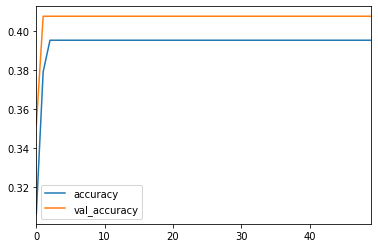

In [29]:
# accuracy（精度）を表示
results[['accuracy', 'val_accuracy']].plot()

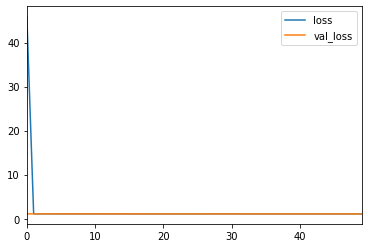

In [30]:
# loss（損失関数）を表示
results[['loss', 'val_loss']].plot()

こちらのデータを見ると、**訓練データよりも検証データが高い精度を記録している**ことがわかります。  
これは通常ありえないことであるため、残念ながら今回出来上がったモデルはあまり良いモデルではないと言えそうです。

### 実践のヒント

今回は一通りの流れを説明しましたが、まだ高い精度を得ることは出来ていません。
ここからは試行錯誤の段階になるのですが、まずいちばん手っ取り早く精度を上げることが出来る方法として、**BatchNormalization** が挙げられます。

実装としては、各バッチ毎に、平均と標準偏差を定めて正規化を行うといった非常に簡単な手法なのですが、これを使用することによって、各変数間のスケールによる差を吸収できます。

それでは、BatchNormazliation がある場合で試してみましょう。

宣言していたニューラルネットワークのモデルを以下のように変更して、もう一度学習を行います。

In [31]:
#  シードの固定
reset_seed(1)

# モデルのインスタンス化
model = models.Sequential()

# モデルの構築
model.add(layers.BatchNormalization(input_shape=(10,)))
model.add(layers.Dense(5, activation='relu', input_shape=(10,)))
model.add(layers.Dense(3, activation='softmax'))
model.add(layers.Activation('softmax')) 

# モデルのコンパイル
model.compile(optimizer='SGD',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# モデルの学習
history = model.fit(train_x, train_t,
          batch_size=10,
          epochs=50,
          verbose=1,
          validation_data=(val_x, val_t))

Train on 124 samples, validate on 54 samples
Epoch 1/50
124/124 [==============================] - 1s 5ms/sample - loss: 1.1446 - accuracy: 0.3468 - val_loss: 1.1996 - val_accuracy: 0.3519
Epoch 2/50
124/124 [==============================] - 0s 397us/sample - loss: 1.1326 - accuracy: 0.3871 - val_loss: 1.1995 - val_accuracy: 0.3519
Epoch 3/50
124/124 [==============================] - 0s 362us/sample - loss: 1.1257 - accuracy: 0.4032 - val_loss: 1.1985 - val_accuracy: 0.3519
Epoch 4/50
124/124 [==============================] - 0s 371us/sample - loss: 1.1193 - accuracy: 0.3952 - val_loss: 1.1950 - val_accuracy: 0.3519
Epoch 5/50
124/124 [==============================] - 0s 365us/sample - loss: 1.1171 - accuracy: 0.4194 - val_loss: 1.1869 - val_accuracy: 0.3519
Epoch 6/50
124/124 [==============================] - 0s 379us/sample - loss: 1.1077 - accuracy: 0.5161 - val_loss: 1.1727 - val_accuracy: 0.3519
Epoch 7/50
124/124 [==============================] - 0s 360us/sample - loss: 1.1

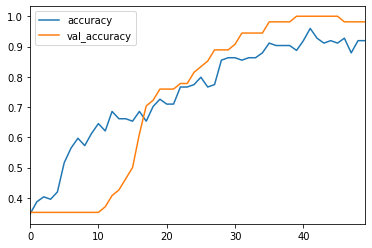

In [32]:
# 学習結果をPandasのDataFrame型で読み込みます。
results = pd.DataFrame(history.history)

# accuracy（精度）を表示
results[['accuracy', 'val_accuracy']].plot()

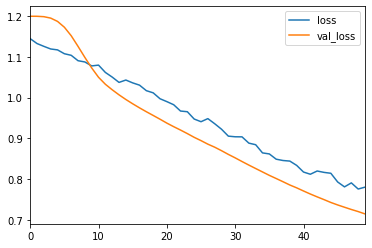

In [33]:
# loss（損失関数）を表示
results[['loss', 'val_loss']].plot()

上記のように Accuracy の値がぐっと良くなっていれば成功です。

このように、ディープラーニングでは、BatchNormalization を含めた細かなポイントがあったりするため、調べながら進めてみてください。Keras では、ほとんどの機能がすでに実装されているため、上記のコードのように少し付け加えるだけでその効果を検証でき非常に便利です。

## 学習済みモデルを保存

学習が終わると、学習済みモデルが得られます。 Keras ではモデル全体（構造＋重み＋最適化関数の状態）の保存が可能です。

Keras に準備されている`model.save(filepath)`を使用すれば HDF5 ファイルにモデルを保存できます。

**補足説明**  
HDF5 (Hierarchical Data Format 5)とは、フォルダとファイルを一括で（ファイルの形式問わず）保存したファイル形式です。

In [34]:
model.save('wine.h5')

こちらで models のフォルダ内に `wine.h5` というファイルができていれば学習済みモデルの保存が完了です。

では現在残っているモデルを削除します。

In [35]:
del model

## 学習済みモデルを使用した推論

### 学習済みモデルのロード

学習済みモデルは`keras.models.load_model(filepath)`を用いて再インスタンス化できます。モデルがすでに一度コンパイルされている場合、`load_model`は、学習時の設定を利用して、コンパイルを行います。

In [36]:
from tensorflow.keras.models import load_model

# モデルの読み込み
model = load_model('wine.h5')

### 予測値の計算

今回は一番最初のサンプルに対する予測値を計算してみましょう。

In [37]:
x_new = train_x[0]

In [38]:
x_new.shape

(10,)

In [39]:
# 予測値の計算
y = model.predict(x_new)

ValueError: Error when checking input: expected batch_normalization_input to have shape (10,) but got array with shape (1,)

推論で使用する際には、`(バッチサイズ, 入力変数の数)` という形式となっていないとエラーが起きます。
今回であれば、`(1, 10)`が望ましいデータの形といえます。

In [40]:
x_new = x_new[np.newaxis]

In [41]:
x_new.shape

(1, 10)

In [42]:
# 予測値の計算
y = model.predict(x_new)
np.argmax(y)

0

このように学習済みモデルを使用して推論を実行できました。